# <center> Segmentation of Survey Respondents based on Demographic and Psychographic Attributes using Clustering 

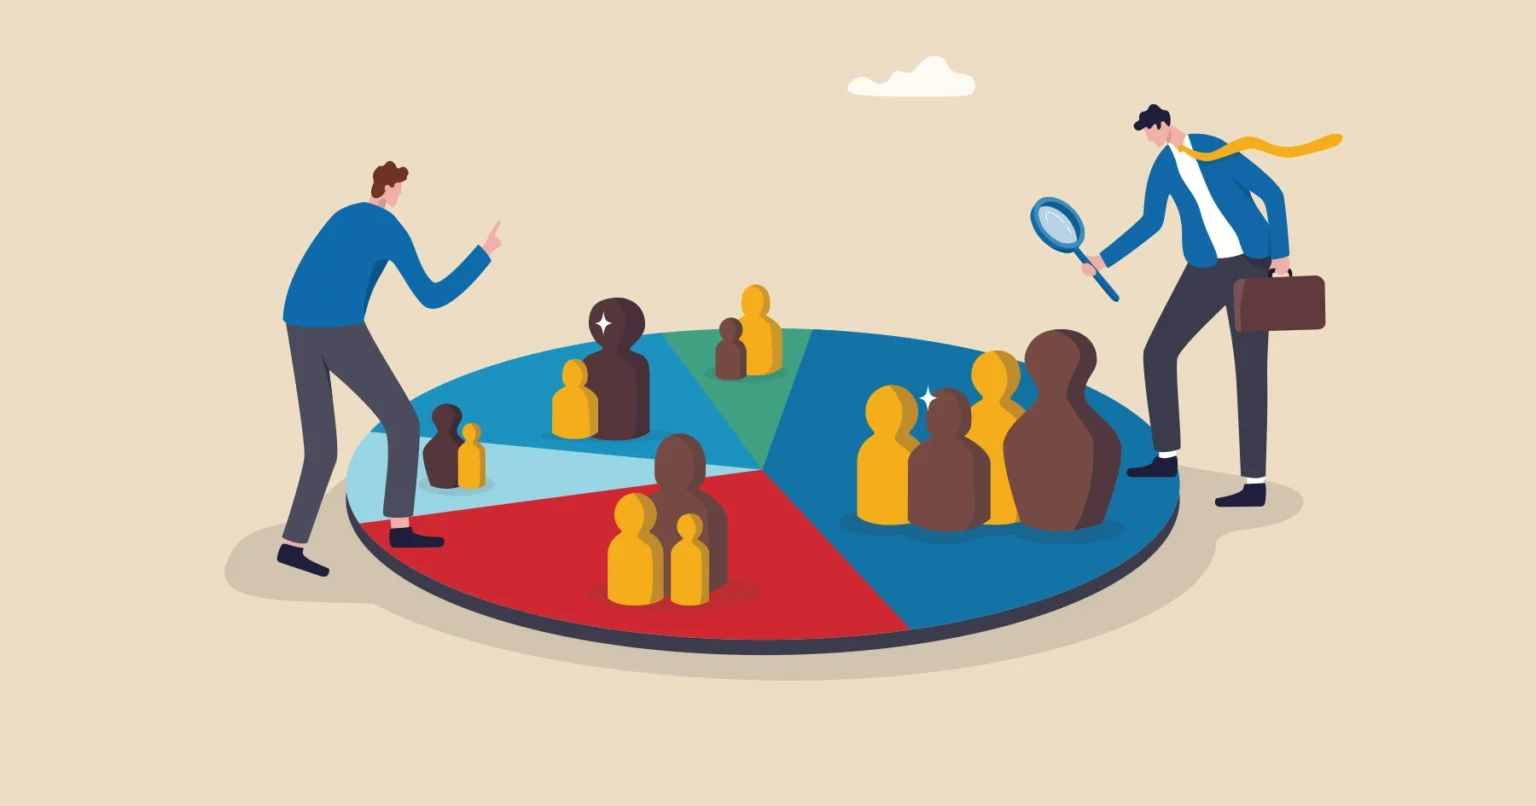

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#Loading the survey data
data = pd.read_csv('L8XR Overlay Respondent Level Data.csv')

In [3]:
data

,Respondent,Start time (GMT),End time (GMT),Q1,Q2,Q3.Living alone,Q3.Living with pets,Q3.Living with a partner,Q3.Living with a spouse,Q3.Living with children,Q3.Living with roomate(s),Q3.Living in my parent(s)' home,Q3.Parents living in my home,Q3.Living with family members other than parents,Q3.Other,Q4.Finding ways to spend more time with my friends/family,Q4.Finding more personal time apart from family obligations,Q4.Maintaining relationships with friends/family,Q4.Building deeper relationships with my significant other or close friends,Q4.Having a lack of spontaneity/fun with my significant other or close friends,Q4.Having a lack of intimacy with my significant other,Q4.Finding ways to make new friends,Q4.Dating and/or finding a significant other,Q4.Taking care of an aging or ill family member/friend,Q4.Finding ways to spend more time with pets,Q4.Deciding whether to have kids,Q4.Navigating how to best raise my kids,Q4.Deciding whether to get married,Q4.Other,Q5._HealthImportance,Q6.Paying off any debts/loans,Q6.Saving money so I can retire early,Q6.Saving to buy my own home,Q6.Saving for education or career advancement (for me or my significant other),Q6.Saving to support my children's education,Q6.Saving money so I can support other relatives,Q6.Saving for an emergency fund,"Q6.Saving, so I can finally enjoy the career I want to, without worrying about money",Q6.Building generational wealth for my family,Q6.Making enough to support the lifestyle I want,"Q6.Balancing saving, investing, and spending",Q6.Sticking to my budget,Q6.To learn more about basic finances,"Q6.To learn more about the latest financial trends (e.g., crypto, NFTs)",Q6.Other,Q7.I have student loans,Q7.I live paycheck to paycheck,Q7.I have credit card debt,Q7.I prefer using my debit card over a credit card,Q7.I have a mortgage,Q7.I have medical/other debt,Q7.I own a credit card,Q7.I selected my credit card to maximize possible rewards,Q7.I pay off my credit card balance in full each month,Q7.I use autopay to pay off my bills,"Q7.I use ""Buy now, pay later"" purchasing tools (i.e., Affirm, Afterpay, Zip, Klarna)",Q8,Q9.Staying up to date with new or current events,Q9.Staying up to date on sports topics,Q9.Learning about new topics,Q9.Finding funny or entertaining content,Q9.Filling up free time,Q9.Staying in touch with friends or family,Q9.Following influencers,Q9.Sharing photos or videos with others,Q9.Online shopping or researching products to buy,Q9.Sharing my opinion,Q9.Meeting new people,Q9.Other,Q9.I do not use social media,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23.Vegan,Q23.Vegetarian,Q23.Pescatarian,Q23.Flexitarian (I eat vegetarian/vegan some of the time),Q23.Paleo,Q23.Keto,Q23.Gluten-free,Q23.Traditional (none of the above),Q23.Other
0,001a2831-304f-4410-bdad-f7872a8d4680,5/5/22 18:56,5/5/22 19:09,25-34,United States,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,4,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Completely confident,1,0,0,0,0,0,1,0,1,0,0,0,0,1990,Male,African American / Black,No,"$150,000 to $199,999",Transportation and Warehousing,Manager / Senior manager / Supervisor,Master's Degree,3,1,Own,Married,Moderately liberal,0,0,0,0,0,0,0,1,0
1,0022b2d7-1cbc-45fb-8626-62fb5db791ca,5/5/22 17:43,5/5/22 18:11,65+,United States,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,Fairly confident,0,0,0,1,0,0,0,0,0,0,0,0,0,1934,Male,Caucasian / White,No,"$50,000 to $74,999",Other,None of the above applies to me,Master's Degree,2,None,Own,Married,Neither liberal nor conservative,0,0,0,0,0,0,0,1,0
2,00495094-a321-4b43-8c72-6f3c5c2b616d,5/6/22 16:47,5/6/22 16:59,25-34,United States,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5 - My health/wellness is the biggest area I a...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,Completely confident,0,0,1,0,1,0,0,0,1,1,0,0,0,1989,Female,Asian / Asian American,No,"$15,000 to $24,999",Utilities,None of the above applies to me,B

### Exploratory Data Analysis and Visualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 92 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   Respondent                                                                            2364 non-null   object
 1   Start time (GMT)                                                                      2364 non-null   object
 2   End time (GMT)                                                                        2364 non-null   object
 3   Q1                                                                                    2364 non-null   object
 4   Q2                                                                                    2364 non-null   object
 5   Q3.Living alone                                                                       2364

In [5]:
#some columns are already one-hot encoded while other require some processing and cleaning 
object_data = data.select_dtypes(include=['object'])
int_data = data.select_dtypes(include=['int64'])

In [6]:
new_data = pd.concat([object_data,int_data], ignore_index=False, axis=1)

In [7]:
new_data

,Respondent,Start time (GMT),End time (GMT),Q1,Q2,Q5._HealthImportance,Q8,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q3.Living alone,Q3.Living with pets,Q3.Living with a partner,Q3.Living with a spouse,Q3.Living with children,Q3.Living with roomate(s),Q3.Living in my parent(s)' home,Q3.Parents living in my home,Q3.Living with family members other than parents,Q3.Other,Q4.Finding ways to spend more time with my friends/family,Q4.Finding more personal time apart from family obligations,Q4.Maintaining relationships with friends/family,Q4.Building deeper relationships with my significant other or close friends,Q4.Having a lack of spontaneity/fun with my significant other or close friends,Q4.Having a lack of intimacy with my significant other,Q4.Finding ways to make new friends,Q4.Dating and/or finding a significant other,Q4.Taking care of an aging or ill family member/friend,Q4.Finding ways to spend more time with pets,Q4.Deciding whether to have kids,Q4.Navigating how to best raise my kids,Q4.Deciding whether to get married,Q4.Other,Q6.Paying off any debts/loans,Q6.Saving money so I can retire early,Q6.Saving to buy my own home,Q6.Saving for education or career advancement (for me or my significant other),Q6.Saving to support my children's education,Q6.Saving money so I can support other relatives,Q6.Saving for an emergency fund,"Q6.Saving, so I can finally enjoy the career I want to, without worrying about money",Q6.Building generational wealth for my family,Q6.Making enough to support the lifestyle I want,"Q6.Balancing saving, investing, and spending",Q6.Sticking to my budget,Q6.To learn more about basic finances,"Q6.To learn more about the latest financial trends (e.g., crypto, NFTs)",Q6.Other,Q7.I have student loans,Q7.I live paycheck to paycheck,Q7.I have credit card debt,Q7.I prefer using my debit card over a credit card,Q7.I have a mortgage,Q7.I have medical/other debt,Q7.I own a credit card,Q7.I selected my credit card to maximize possible rewards,Q7.I pay off my credit card balance in full each month,Q7.I use autopay to pay off my bills,"Q7.I use ""Buy now, pay later"" purchasing tools (i.e., Affirm, Afterpay, Zip, Klarna)",Q9.Staying up to date with new or current events,Q9.Staying up to date on sports topics,Q9.Learning about new topics,Q9.Finding funny or entertaining content,Q9.Filling up free time,Q9.Staying in touch with friends or family,Q9.Following influencers,Q9.Sharing photos or videos with others,Q9.Online shopping or researching products to buy,Q9.Sharing my opinion,Q9.Meeting new people,Q9.Other,Q9.I do not use social media,Q10,Q23.Vegan,Q23.Vegetarian,Q23.Pescatarian,Q23.Flexitarian (I eat vegetarian/vegan some of the time),Q23.Paleo,Q23.Keto,Q23.Gluten-free,Q23.Traditional (none of the above),Q23.Other
0,001a2831-304f-4410-bdad-f7872a8d4680,5/5/22 18:56,5/5/22 19:09,25-34,United States,4,Completely confident,Male,African American / Black,No,"$150,000 to $199,999",Transportation and Warehousing,Manager / Senior manager / Supervisor,Master's Degree,3,1,Own,Married,Moderately liberal,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1990,0,0,0,0,0,0,0,1,0
1,0022b2d7-1cbc-45fb-8626-62fb5db791ca,5/5/22 17:43,5/5/22 18:11,65+,United States,4,Fairly confident,Male,Caucasian / White,No,"$50,000 to $74,999",Other,None of the above applies to me,Master's Degree,2,None,Own,Married,Neither liberal nor conservative,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1934,0,0,0,0,0,0,0,1,0
2,00495094-a321-4b43-8c72-6f3c5c2b616d,5/6/22 16:47,5/6/22 16:59,25-34,United States,5 - My health/wellness is the biggest area I a...,Completely confident,Female,Asian / Asian American,No,"$15,000 to $24,999",Utilities,None of the above applies to me,Bachelor's Degree,3,1,Rent,Married,Extremely conservative,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,

In [8]:
new_data.isnull().sum()

Respondent                             0
Start time (GMT)                       0
End time (GMT)                         0
Q1                                     0
Q2                                     0
                                      ..
Q23.Paleo                              0
Q23.Keto                               0
Q23.Gluten-free                        0
Q23.Traditional (none of the above)    0
Q23.Other                              0
Length: 92, dtype: int64

In [9]:
object_data.columns

Index(['Respondent', 'Start time (GMT)', 'End time (GMT)', 'Q1', 'Q2',
       'Q5._HealthImportance', 'Q8', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22'],
      dtype='object')

In [10]:
#rename columns to gauge the context instead of the question

new_data = new_data.rename(columns = {'Q1': 'Q1_Age','Q2': 'Q2_Country','Q8':'Q8_FinConfidence', 'Q11':'Q11_Gender',\
                           'Q12':'Q12_Ethnicity', 'Q13' :'Q13_Hispanic', 'Q14':'Q14_Income', 'Q15':'Q15_Industry',\
                           'Q16':'Q16_Designation','Q17': 'Q17_Education', 'Q18':'Q18_PeopleinHH', \
                           'Q19':'Q19_No.ofChildren', 'Q20': 'Q20_Rent/Own', 'Q21':'Q21_MaritalStatus',\
                           'Q22':'Q22_Political', 'Q3.Living alone':'Q3_HHStructure.Living alone',\
                           'Q4.Finding ways to spend more time with my friends/family': \
                           'Q4_RelationshipConcerns.Finding ways to spend more time with my friends/family',\
                           'Q6.Paying off any debts/loans': 'Q6_FinGoals.Paying off any debts/loans',\
                           'Q7.I have student loans':'Q7_FinHabitsI have student loans', \
                           'Q9.Staying up to date with new or current events':\
                           'Q9_SocialMediaUsage.Staying up to date with new or current events',\
                           'Q23.Vegan ': 'Q23_FoodHabits.Vegan'})

In [11]:
new_data.columns

Index(['Respondent', 'Start time (GMT)', 'End time (GMT)', 'Q1_Age',
       'Q2_Country', 'Q5._HealthImportance', 'Q8_FinConfidence', 'Q11_Gender',
       'Q12_Ethnicity', 'Q13_Hispanic', 'Q14_Income', 'Q15_Industry',
       'Q16_Designation', 'Q17_Education', 'Q18_PeopleinHH',
       'Q19_No.ofChildren', 'Q20_Rent/Own', 'Q21_MaritalStatus',
       'Q22_Political', 'Q3_HHStructure.Living alone', 'Q3.Living with pets',
       'Q3.Living with a partner', 'Q3.Living with a spouse',
       'Q3.Living with children', 'Q3.Living with roomate(s)',
       'Q3.Living in my parent(s)' home', 'Q3.Parents living in my home',
       'Q3.Living with family members other than parents', 'Q3.Other',
       'Q4_RelationshipConcerns.Finding ways to spend more time with my friends/family',
       'Q4.Finding more personal time apart from family obligations',
       'Q4.Maintaining relationships with friends/family',
       'Q4.Building deeper relationships with my significant other or close friends',
    

In [12]:
new_data.head()

,Respondent,Start time (GMT),End time (GMT),Q1_Age,Q2_Country,Q5._HealthImportance,Q8_FinConfidence,Q11_Gender,Q12_Ethnicity,Q13_Hispanic,Q14_Income,Q15_Industry,Q16_Designation,Q17_Education,Q18_PeopleinHH,Q19_No.ofChildren,Q20_Rent/Own,Q21_MaritalStatus,Q22_Political,Q3_HHStructure.Living alone,Q3.Living with pets,Q3.Living with a partner,Q3.Living with a spouse,Q3.Living with children,Q3.Living with roomate(s),Q3.Living in my parent(s)' home,Q3.Parents living in my home,Q3.Living with family members other than parents,Q3.Other,Q4_RelationshipConcerns.Finding ways to spend more time with my friends/family,Q4.Finding more personal time apart from family obligations,Q4.Maintaining relationships with friends/family,Q4.Building deeper relationships with my significant other or close friends,Q4.Having a lack of spontaneity/fun with my significant other or close friends,Q4.Having a lack of intimacy with my significant other,Q4.Finding ways to make new friends,Q4.Dating and/or finding a significant other,Q4.Taking care of an aging or ill family member/friend,Q4.Finding ways to spend more time with pets,Q4.Deciding whether to have kids,Q4.Navigating how to best raise my kids,Q4.Deciding whether to get married,Q4.Other,Q6_FinGoals.Paying off any debts/loans,Q6.Saving money so I can retire early,Q6.Saving to buy my own home,Q6.Saving for education or career advancement (for me or my significant other),Q6.Saving to support my children's education,Q6.Saving money so I can support other relatives,Q6.Saving for an emergency fund,"Q6.Saving, so I can finally enjoy the career I want to, without worrying about money",Q6.Building generational wealth for my family,Q6.Making enough to support the lifestyle I want,"Q6.Balancing saving, investing, and spending",Q6.Sticking to my budget,Q6.To learn more about basic finances,"Q6.To learn more about the latest financial trends (e.g., crypto, NFTs)",Q6.Other,Q7_FinHabitsI have student loans,Q7.I live paycheck to paycheck,Q7.I have credit card debt,Q7.I prefer using my debit card over a credit card,Q7.I have a mortgage,Q7.I have medical/other debt,Q7.I own a credit card,Q7.I selected my credit card to maximize possible rewards,Q7.I pay off my credit card balance in full each month,Q7.I use autopay to pay off my bills,"Q7.I use ""Buy now, pay later"" purchasing tools (i.e., Affirm, Afterpay, Zip, Klarna)",Q9_SocialMediaUsage.Staying up to date with new or current events,Q9.Staying up to date on sports topics,Q9.Learning about new topics,Q9.Finding funny or entertaining content,Q9.Filling up free time,Q9.Staying in touch with friends or family,Q9.Following influencers,Q9.Sharing photos or videos with others,Q9.Online shopping or researching products to buy,Q9.Sharing my opinion,Q9.Meeting new people,Q9.Other,Q9.I do not use social media,Q10,Q23_FoodHabits.Vegan,Q23.Vegetarian,Q23.Pescatarian,Q23.Flexitarian (I eat vegetarian/vegan some of the time),Q23.Paleo,Q23.Keto,Q23.Gluten-free,Q23.Traditional (none of the above),Q23.Other
0,001a2831-304f-4410-bdad-f7872a8d4680,5/5/22 18:56,5/5/22 19:09,25-34,United States,4,Completely confident,Male,African American / Black,No,"$150,000 to $199,999",Transportation and Warehousing,Manager / Senior manager / Supervisor,Master's Degree,3,1,Own,Married,Moderately liberal,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1990,0,0,0,0,0,0,0,1,0
1,0022b2d7-1cbc-45fb-8626-62fb5db791ca,5/5/22 17:43,5/5/22 18:11,65+,United States,4,Fairly confident,Male,Caucasian / White,No,"$50,000 to $74,999",Other,None of the above applies to me,Master's Degree,2,None,Own,Married,Neither liberal nor conservative,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1934,0,0,0,0,0,0,0,1,0
2,00495094-a321-4b43-8c72-6f3c5c2b616d,5/6/22 16:47,5/6/22 16:59,25-34,United States,5 - My health/wellness is the biggest area I a...,Completely confident,F

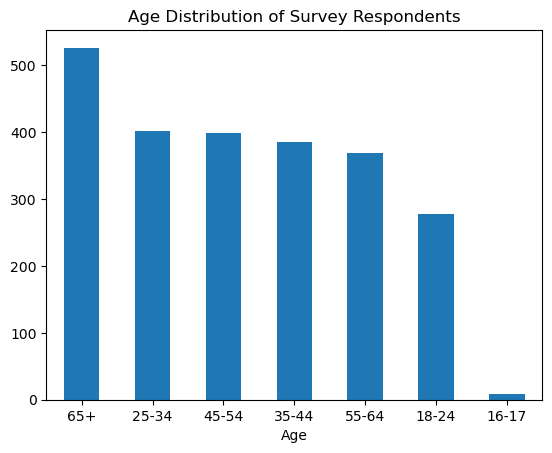

In [13]:
new_data['Q1_Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.title('Age Distribution of Survey Respondents')
plt.xticks(rotation=0)
plt.show()

**Inference**: The survey respondents are well distributed across age groups 

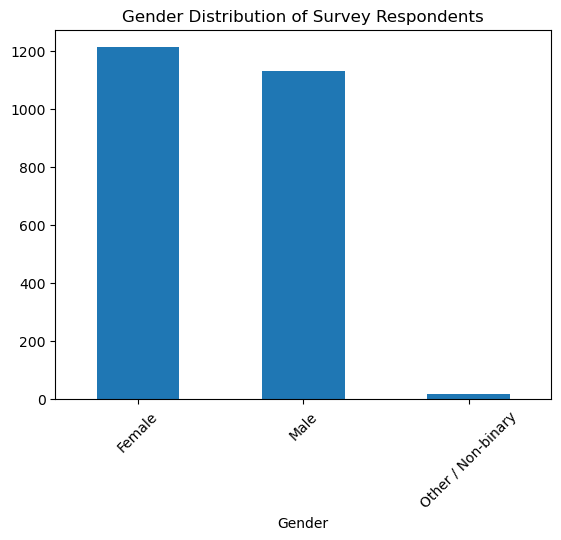

In [15]:
new_data['Q11_Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.title('Gender Distribution of Survey Respondents')
plt.xticks(rotation=45)
plt.show()

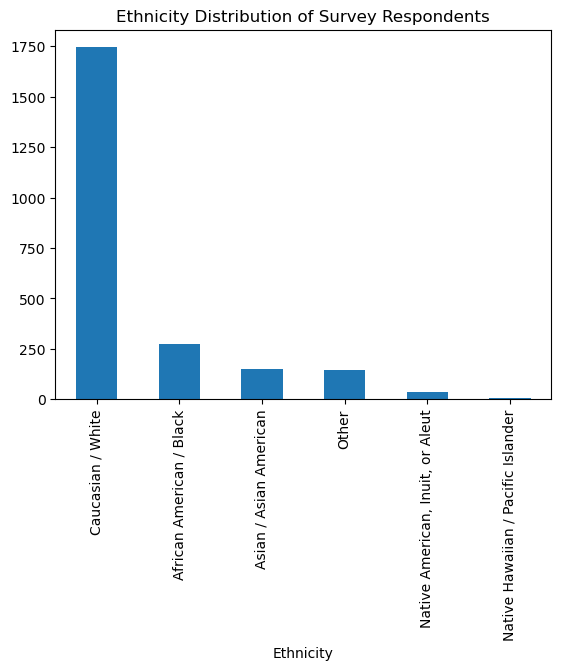

In [16]:
new_data['Q12_Ethnicity'].value_counts().plot(kind='bar')
plt.xlabel('Ethnicity')
plt.title('Ethnicity Distribution of Survey Respondents')
plt.xticks(rotation=90)
plt.show()

**Inference**: Majority of the respondents are Caucasians

In [18]:
new_data['Q14_Income'].value_counts()

$25,000 to $49,999      506
$100,000 to $149,999    397
$50,000 to $74,999      392
$75,000 to $99,999      341
$15,000 to $24,999      222
Less than $15,000       206
$150,000 to $199,999    138
$200,000 to $249,999     84
$250,000 or more         78
Name: Q14_Income, dtype: int64

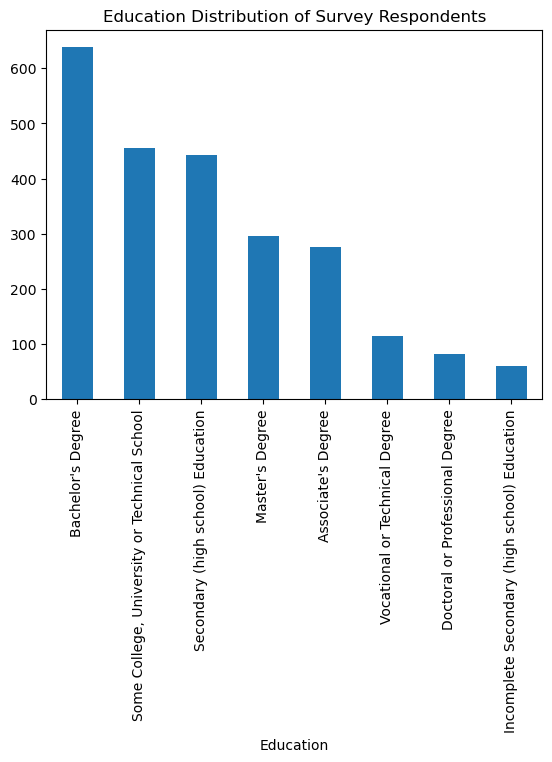

In [19]:
new_data['Q17_Education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.title('Education Distribution of Survey Respondents')
plt.xticks(rotation=90)
plt.show()

**Inference**: Majority of the respondents have a bachelors degree 

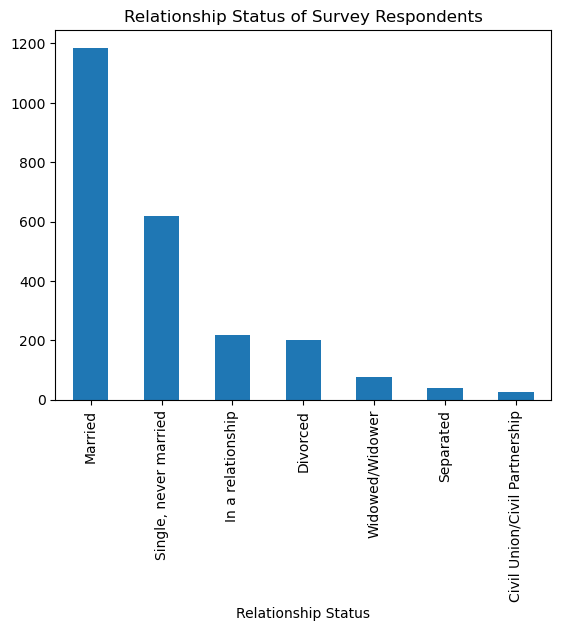

In [21]:
new_data['Q21_MaritalStatus'].value_counts().plot(kind='bar')
plt.xlabel('Relationship Status')
plt.title('Relationship Status of Survey Respondents')
plt.xticks(rotation=90)
plt.show()

**Inference**: Majority of the respondents are married

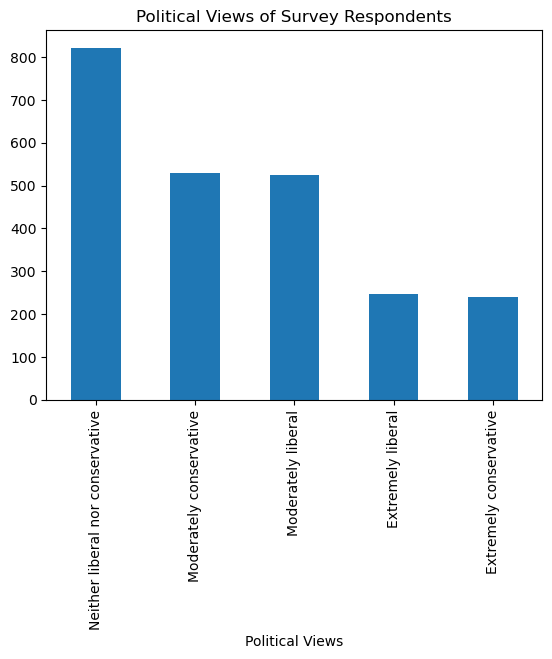

In [23]:
new_data['Q22_Political'].value_counts().plot(kind='bar')
plt.xlabel('Political Views')
plt.title('Political Views of Survey Respondents')
plt.xticks(rotation=90)
plt.show()

### Processing and cleaning of data; Feature selection

In [24]:
#checking correlation between variables 
corr =new_data.corr()< 0.25

/var/folders/p_/d57tpnkj54l60xy2z6dzdd400000gn/T/ipykernel_11379/3266633606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =new_data.corr()< 0.25


<Axes: >

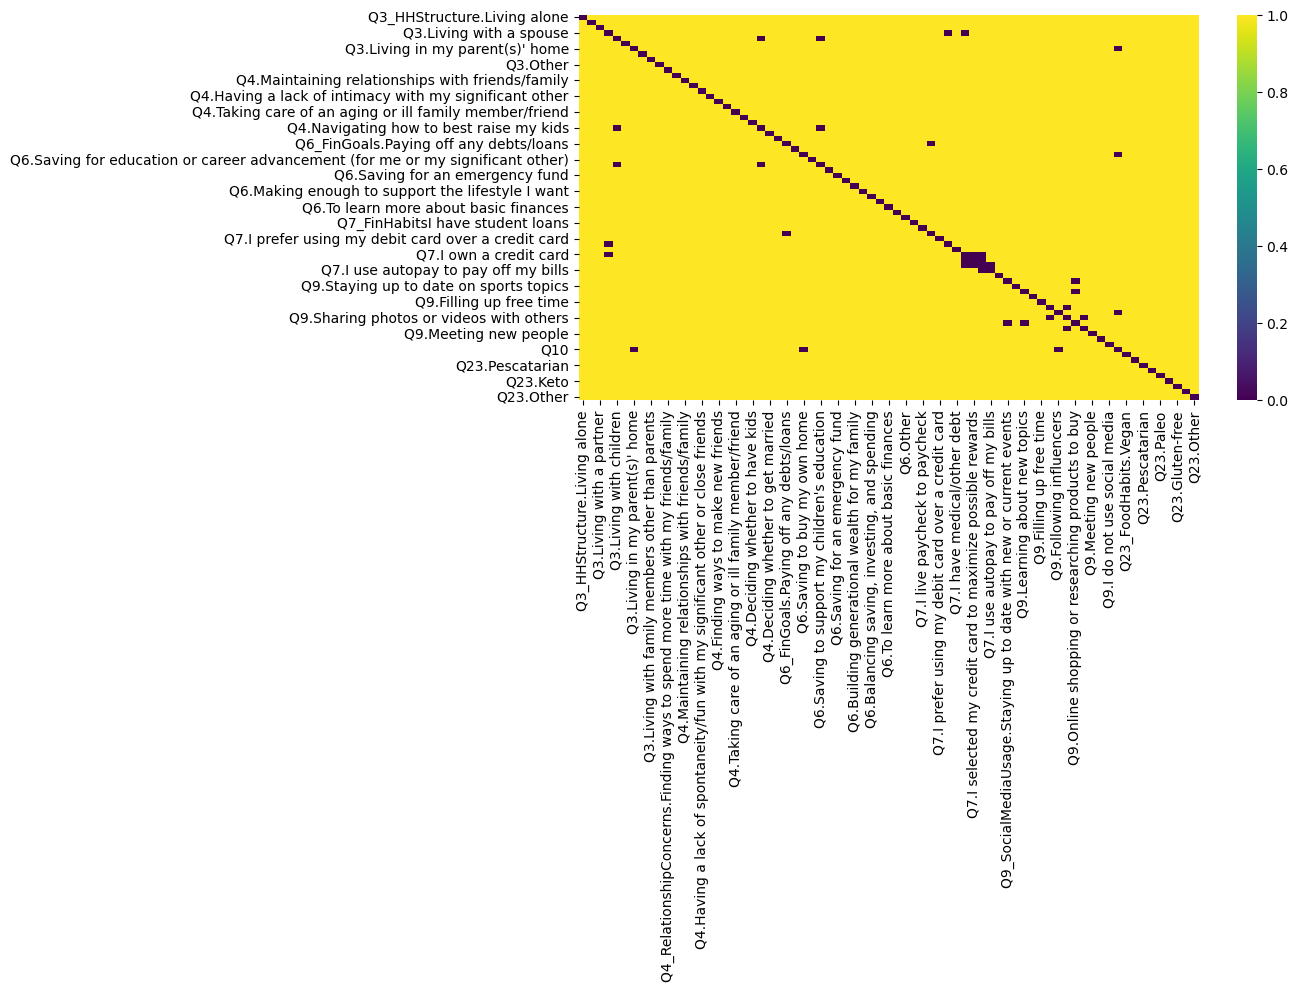

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap='viridis')

In [26]:
#Only selecting variables that have high standard deviation (more than 75% of the mean of std) \
#since variables with low variance do not contribute a lot in the ML model
new_data.describe().loc['std'].mean()

0.5884280994297272

In [27]:
high_std =new_data.describe().loc['std']>0.75*new_data.describe().loc['std'].mean()

In [28]:
high_std = pd.DataFrame(high_std)

In [29]:
encoded_var = high_std[high_std['std']== True].T.columns
encoded_var

Index(['Q3.Living with pets', 'Q3.Living with a spouse',
       'Q3.Living with children',
       'Q4_RelationshipConcerns.Finding ways to spend more time with my friends/family',
       'Q4.Maintaining relationships with friends/family',
       'Q6_FinGoals.Paying off any debts/loans',
       'Q6.Saving for an emergency fund',
       'Q6.Making enough to support the lifestyle I want',
       'Q6.Balancing saving, investing, and spending',
       'Q6.Sticking to my budget', 'Q7.I live paycheck to paycheck',
       'Q7.I have credit card debt', 'Q7.I have a mortgage',
       'Q7.I own a credit card',
       'Q7.I pay off my credit card balance in full each month',
       'Q9_SocialMediaUsage.Staying up to date with new or current events',
       'Q9.Finding funny or entertaining content', 'Q9.Filling up free time',
       'Q9.Staying in touch with friends or family',
       'Q9.Sharing photos or videos with others', 'Q10'],
      dtype='object')

In [30]:
#there are a few other columns that can be ordinally encoded basis the ranking 

new_data[['Q5._HealthImportance','Q18_PeopleinHH','Q19_No.ofChildren']]

,Q5._HealthImportance,Q18_PeopleinHH,Q19_No.ofChildren
0,4,3,1
1,4,2,None
2,5 - My health/wellness is the biggest area I a...,3,1
3,5 - My health/wellness is the biggest area I a...,3,None
4,4,2,None
...,...,...,...
2359,3,4,2
2360,4,2,None
2361,3,1,#NULL!
2362,1 - My health/wellness is not a major focus ar...,5 or more,None


In [31]:
new_data[['Q5._HealthImportance']].value_counts()

Q5._HealthImportance                                      
4                                                             762
3                                                             743
5 - My health/wellness is the biggest area I am focused on    494
2                                                             214
1 - My health/wellness is not a major focus area for me       151
dtype: int64

In [32]:
new_data[['Q18_PeopleinHH']].value_counts()

Q18_PeopleinHH
2                 919
3                 471
1                 402
4                 349
5 or more         223
dtype: int64

In [33]:
new_data[['Q19_No.ofChildren']].value_counts()

Q19_No.ofChildren
None                 1227
#NULL!                402
1                     355
2                     252
3                      81
5 or more              24
4                      23
dtype: int64

In [34]:
# here we replace None with 0 and then impute the null values with 'Unknown' rather than imputing it with the\
#most frequent observation. Will not ordinal encode it and retain it as a categorical variable 

new_data['Q19_No.ofChildren']=\
new_data['Q19_No.ofChildren'].map({'#NULL!':'Unknown', 'None': '0', '1':'1', '2':'2', '3':'3', '4':'4',\
                                   '5 or more':'5'})



In [35]:
new_data[['Q19_No.ofChildren']].value_counts()

Q19_No.ofChildren
0                    1227
Unknown               402
1                     355
2                     252
3                      81
5                      24
4                      23
dtype: int64

In [36]:
#setting the ranking for ordinal encoding
health_imp_cat = ['1 - My health/wellness is not a major focus area for me','2','3','4', \
              '5 - My health/wellness is the biggest area I am focused on']                                                           
hh_cat = ['1','2','3','4','5 or more']


In [37]:
#ordinally encoding categorical variables basis the ranking 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[health_imp_cat,hh_cat])
new_data[['Q5._HealthImportance','Q18_PeopleinHH']]= \
enc.fit_transform(new_data[['Q5._HealthImportance','Q18_PeopleinHH']])

In [38]:
#Variables to be included in the clustering algorithms are 
#encoded variables
list(new_data[['Q5._HealthImportance','Q18_PeopleinHH']])
encoded_var = list(encoded_var) + list(new_data[['Q5._HealthImportance','Q18_PeopleinHH']])
encoded_var

['Q3.Living with pets',
 'Q3.Living with a spouse',
 'Q3.Living with children',
 'Q4_RelationshipConcerns.Finding ways to spend more time with my friends/family',
 'Q4.Maintaining relationships with friends/family',
 'Q6_FinGoals.Paying off any debts/loans',
 'Q6.Saving for an emergency fund',
 'Q6.Making enough to support the lifestyle I want',
 'Q6.Balancing saving, investing, and spending',
 'Q6.Sticking to my budget',
 'Q7.I live paycheck to paycheck',
 'Q7.I have credit card debt',
 'Q7.I have a mortgage',
 'Q7.I own a credit card',
 'Q7.I pay off my credit card balance in full each month',
 'Q9_SocialMediaUsage.Staying up to date with new or current events',
 'Q9.Finding funny or entertaining content',
 'Q9.Filling up free time',
 'Q9.Staying in touch with friends or family',
 'Q9.Sharing photos or videos with others',
 'Q10',
 'Q5._HealthImportance',
 'Q18_PeopleinHH']

In [39]:
#categorical variables
cat_var = new_data.select_dtypes(include=['object']).columns
list(cat_var)

['Respondent',
 'Start time (GMT)',
 'End time (GMT)',
 'Q1_Age',
 'Q2_Country',
 'Q8_FinConfidence',
 'Q11_Gender',
 'Q12_Ethnicity',
 'Q13_Hispanic',
 'Q14_Income',
 'Q15_Industry',
 'Q16_Designation',
 'Q17_Education',
 'Q19_No.ofChildren',
 'Q20_Rent/Own',
 'Q21_MaritalStatus',
 'Q22_Political']

In [40]:
df_1 = pd.DataFrame(new_data, columns =cat_var)

In [41]:
df_2 = pd.DataFrame(new_data, columns =encoded_var)

In [42]:
df = pd.concat([df_1,df_2], axis=1, ignore_index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 40 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Respondent                                                                      2364 non-null   object 
 1   Start time (GMT)                                                                2364 non-null   object 
 2   End time (GMT)                                                                  2364 non-null   object 
 3   Q1_Age                                                                          2364 non-null   object 
 4   Q2_Country                                                                      2364 non-null   object 
 5   Q8_FinConfidence                                                                2364 non-null   object 
 6   Q11_Gender      

In [43]:
#dropping the first few columns as they do not contribute to the ML algorithm 
df.drop(['Respondent','Start time (GMT)','End time (GMT)','Q2_Country'], axis=1, inplace= True)

In [44]:
# to get position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
catColumnsPos

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [51]:
df_matrix = df.values
df_matrix

array([['25-34', 'Completely confident', 'Male', ..., 1990, 3.0, 2.0],
       ['65+', 'Fairly confident', 'Male', ..., 1934, 3.0, 1.0],
       ['25-34', 'Completely confident', 'Female', ..., 1989, 4.0, 2.0],
       ...,
       ['65+', 'Fairly confident', 'Female', ..., 1952, 2.0, 0.0],
       ['35-44', 'Completely confident', 'Male', ..., 1979, 0.0, 4.0],
       ['25-34', 'Fairly confident', 'Male', ..., 1992, 3.0, 3.0]],
      dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 36 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Q1_Age                                                                          2364 non-null   object 
 1   Q8_FinConfidence                                                                2364 non-null   object 
 2   Q11_Gender                                                                      2364 non-null   object 
 3   Q12_Ethnicity                                                                   2364 non-null   object 
 4   Q13_Hispanic                                                                    2364 non-null   object 
 5   Q14_Income                                                                      2364 non-null   object 
 6   Q15_Industry    

### Modeling


Since majority of the features we want to consider for our analysis are categorical in nature with a few features already one-hot encoded, it is ideal to use k-protoptype as our clutering algorithm that considers both the numerical as well as categorical features

In [48]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


<function matplotlib.pyplot.show(close=None, block=None)>

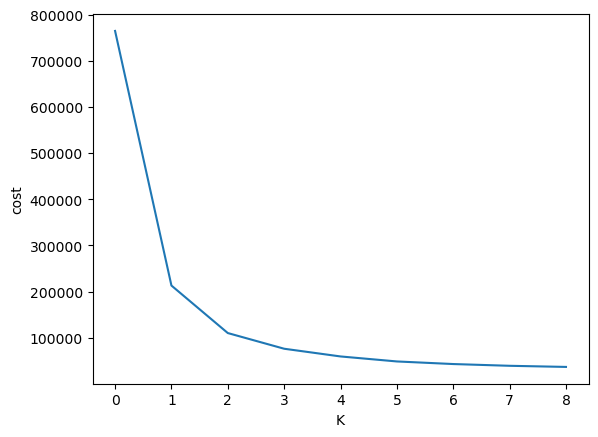

In [54]:
#check for the ideal number of clusters using the elbow method
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(df_matrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

Here, 3 clusters seems ideal

In [66]:
kproto = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
df['clusters']= kproto.fit_predict(df_matrix, categorical = catColumnsPos)

<Axes: >

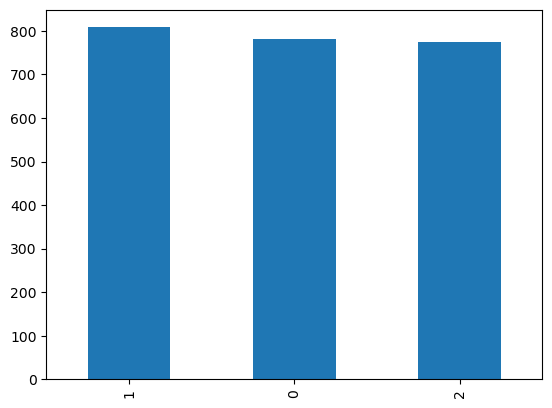

In [76]:
#analyzing the clusters

df['clusters'].value_counts().plot(kind='bar')

In [80]:
#stats of the numerical variables
df.groupby(['clusters']).mean()

/var/folders/p_/d57tpnkj54l60xy2z6dzdd400000gn/T/ipykernel_11379/517678032.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['clusters']).mean()


,Q3.Living with pets,Q3.Living with a spouse,Q3.Living with children,Q4_RelationshipConcerns.Finding ways to spend more time with my friends/family,Q4.Maintaining relationships with friends/family,Q6_FinGoals.Paying off any debts/loans,Q6.Saving for an emergency fund,Q6.Making enough to support the lifestyle I want,"Q6.Balancing saving, investing, and spending",Q6.Sticking to my budget,Q7.I live paycheck to paycheck,Q7.I have credit card debt,Q7.I have a mortgage,Q7.I own a credit card,Q7.I pay off my credit card balance in full each month,Q9_SocialMediaUsage.Staying up to date with new or current events,Q9.Finding funny or entertaining content,Q9.Filling up free time,Q9.Staying in touch with friends or family,Q9.Sharing photos or videos with others,Q10,Q5._HealthImportance,Q18_PeopleinHH
clusters,,,,,,,,,,,,,,,,,,,,,,,
0,0.285166,0.617647,0.136829,0.332481,0.494885,0.310742,0.350384,0.373402,0.442455,0.313299,0.167519,0.225064,0.290281,0.792839,0.589514,0.237852,0.217391,0.204604,0.579284,0.198210,1953.127877,2.592072,1.057545
1,0.327970,0.258663,0.335396,0.362624,0.399752,0.325495,0.308168,0.402228,0.355198,0.305693,0.341584,0.298267,0.200495,0.450495,0.210396,0.340347,0.449257,0.448020,0.514851,0.394802,1993.676980,2.448020,1.990099
2,0.373385,0.529716,0.462532,0.347545,0.421189,0.412145,0.386305,0.432817,0.375969,0.303618,0.330749,0.377261,0.359173,0.621447,0.297158,0.320413,0.370801,0.368217,0.616279,0.294574,1973.571059,2.528424,1.763566


In [90]:
#stats of categorical data across clusters
df.groupby(['clusters']).agg(lambda x: pd.Series.mode(x).iat[0])[['Q1_Age', 'Q8_FinConfidence', 'Q11_Gender', 'Q12_Ethnicity',
       'Q13_Hispanic', 'Q14_Income', 'Q15_Industry', 'Q16_Designation',
       'Q17_Education', 'Q19_No.ofChildren', 'Q20_Rent/Own',
       'Q21_MaritalStatus', 'Q22_Political']]

,Q1_Age,Q8_FinConfidence,Q11_Gender,Q12_Ethnicity,Q13_Hispanic,Q14_Income,Q15_Industry,Q16_Designation,Q17_Education,Q19_No.ofChildren,Q20_Rent/Own,Q21_MaritalStatus,Q22_Political
clusters,,,,,,,,,,,,,
0,65+,Fairly confident,Male,Caucasian / White,No,"$100,000 to $149,999",Other,None of the above applies to me,Bachelor's Degree,0,Own,Married,Moderately conservative
1,25-34,Fairly confident,Female,Caucasian / White,No,"$25,000 to $49,999",Other,None of the above applies to me,Secondary (high school) Education,0,Rent,"Single, never married",Neither liberal nor conservative
2,45-54,Fairly confident,Female,Caucasian / White,No,"$25,000 to $49,999",Other,None of the above applies to me,Bachelor's Degree,0,Own,Married,Neither liberal nor conservative


In [102]:
kproto.cluster_centroids_

array([['0.2851662404092072', '0.6176470588235294',
        '0.13682864450127877', '0.33248081841432225',
        '0.4948849104859335', '0.31074168797953966',
        '0.35038363171355497', '0.3734015345268542',
        '0.4424552429667519', '0.3132992327365729',
        '0.16751918158567775', '0.22506393861892582',
        '0.29028132992327366', '0.7928388746803069',
        '0.5895140664961637', '0.23785166240409208',
        '0.21739130434782608', '0.20460358056265984',
        '0.5792838874680307', '0.19820971867007672',
        '1953.1278772378516', '2.5920716112531967', '1.0575447570332481',
        '65+', 'Fairly confident', 'Male', 'Caucasian / White', 'No',
        '$100,000 to $149,999', 'Other',
        'None of the above applies to me', "Bachelor's Degree", '0',
        'Own', 'Married', 'Moderately conservative'],
       ['0.327970297029703', '0.25866336633663367', '0.3353960396039604',
        '0.3626237623762376', '0.3997524752475248', '0.3254950495049505',
        '0.30

In [133]:
# checking if our model makes prediction on an unknown class

kproto.predict(df.iloc[3:7,:-1].values, categorical=catColumnsPos)

array([0, 0, 1, 2], dtype=uint16)

In [134]:
df.iloc[3:7]

,Q1_Age,Q8_FinConfidence,Q11_Gender,Q12_Ethnicity,Q13_Hispanic,Q14_Income,Q15_Industry,Q16_Designation,Q17_Education,Q19_No.ofChildren,Q20_Rent/Own,Q21_MaritalStatus,Q22_Political,Q3.Living with pets,Q3.Living with a spouse,Q3.Living with children,Q4_RelationshipConcerns.Finding ways to spend more time with my friends/family,Q4.Maintaining relationships with friends/family,Q6_FinGoals.Paying off any debts/loans,Q6.Saving for an emergency fund,Q6.Making enough to support the lifestyle I want,"Q6.Balancing saving, investing, and spending",Q6.Sticking to my budget,Q7.I live paycheck to paycheck,Q7.I have credit card debt,Q7.I have a mortgage,Q7.I own a credit card,Q7.I pay off my credit card balance in full each month,Q9_SocialMediaUsage.Staying up to date with new or current events,Q9.Finding funny or entertaining content,Q9.Filling up free time,Q9.Staying in touch with friends or family,Q9.Sharing photos or videos with others,Q10,Q5._HealthImportance,Q18_PeopleinHH,clusters
3,55-64,Completely confident,Male,Caucasian / White,No,"$75,000 to $99,999",Other,None of the above applies to me,"Some College, University or Technical School",0,Own,Married,Neither liberal nor conservative,0,1,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0,1957,4.0,2.0,0
4,55-64,Fairly confident,Female,Caucasian / White,Yes,"$15,000 to $24,999",Transportation and Warehousing,Manager / Senior manager / Supervisor,Bachelor's Degree,0,Own,Married,Moderately conservative,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1962,3.0,1.0,0
5,18-24,Slightly confident,Male,Other,Yes,"$15,000 to $24,999",Construction,Self-employed,Secondary (high school) Education,2,Own,Married,Moderately liberal,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,2002,4.0,3.0,1
6,35-44,Somewhat confident,Male,Caucasian / White,No,"$250,000 or more","Professional, Scientific, and Technical Services",Vice President,Master's Degree,2,Own,Divorced,Moderately liberal,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1977,3.0,2.0,2


In [ ]:
#end